# Preliminaries: Image Processing

What makes an image look sharp or blurred to our eyes? How can we detect important features, such as boundaries between objects?

## Edge Detection Problem in Image Processing

Edge detection is a classical problem in image processing. The goal is to identify the boundaries of objects in an image.

![](https://media.geeksforgeeks.org/wp-content/uploads/20240616211411/Screenshot-(85).webp)

To approach the problem, recall that an image is essentially a matrix of pixel intensity values. In a **grayscale** image, each pixel has a single intensity value representing its brightness, so we can think of the image as a 2D matrix of brightness values.

![](https://ai.stanford.edu/~syyeung/cvweb/Pictures1/imagematrix.png)

## A Simple Example of Horizontal Edge Detection

Human eyes are very sensitive to sudden changes in brightness. An edge in an image appears when there is a **significant brightness change** between neighboring pixels. Suppose we have a small 6x6 image with a bright vertical line:

$$
X = \begin{bmatrix}
10 & 10 & 80 & 10 & 10 & 10 \\
10 & 10 & 80 & 10 & 10 & 10 \\
10 & 10 & 80 & 10 & 10 & 10 \\
10 & 10 & 80 & 10 & 10 & 10 \\
10 & 10 & 80 & 10 & 10 & 10 \\
10 & 10 & 80 & 10 & 10 & 10
\end{bmatrix}
$$

If we zoom in on the central region:

$$
Z = \begin{bmatrix}
10 & 80 & 10 \\
\textcolor{blue}{10} & \textcolor{red}{80} & \textcolor{purple}{10} \\
10 & 80 & 10
\end{bmatrix}
$$

The pixel of interest is highlighted in **red**. To detect a horizontal brightness change, we can approximate the derivative at the central pixel by subtracting the right-neighbor from the left-neighbor:

$$
\nabla Z_{22} = \textcolor{blue}{Z_{2,1}} \;-\; \textcolor{purple}{Z_{2,3}}
$$

Repeating this for every pixel yields the **horizontal derivative** of the entire 6x6 image:

$$
\begin{bmatrix}
- & -70 & 0 & 70 & 0 & - \\
- & -70 & 0 & 70 & 0 & - \\
- & -70 & 0 & 70 & 0 & - \\
- & -70 & 0 & 70 & 0 & - \\
- & -70 & 0 & 70 & 0 & - \\
- & -70 & 0 & 70 & 0 & -
\end{bmatrix}
$$

The symbol “-” indicates undefined values at the boundary, where we do not have neighbors on both sides. Notice that the derivative is large around the central line (the edge) and zero elsewhere.

We could also compute a **vertical derivative** by subtracting the bottom-neighbor from the top-neighbor:

$$
\nabla Z_{22} = Z_{1,2} \;-\; Z_{3,2}
$$

When applied to the entire image, this vertical derivative is zero because there is no vertical change in brightness.

## Convolution

Notice that in these derivative calculations we are repeatedly taking weighted sums (subtractions) of neighboring pixels. This suggests a more general operation called **convolution**, where we define a small matrix of weights called a **kernel** (or filter) and “slide” it over each pixel in the image.

Mathematically, for a 3x3 kernel $$K$$ applied to the central pixel of a local patch $$Z$$:

$$
\nabla Z_{22} = \sum_{i=-1}^1 \sum_{j=-1}^1 K_{h-(i+1),w-(j+1)} \,Z_{2+i, 2+j},
$$

where $h=w=3$ are the kernel’s height and width.

```{note}
In strict mathematical notation, when we say "convolution," we often **flip** the kernel before we do the sum. That is, we reorder:

$$
K = \begin{bmatrix}
K_{33} & K_{32} & K_{31} \\
K_{23} & K_{22} & K_{21} \\
K_{13} & K_{12} & K_{11}
\end{bmatrix}
$$

so that when we multiply element-by-element by $Z$ and sum, we replicate the formal definition of convolution. In image processing practice, some software libraries call this “cross-correlation” if they do not flip the kernel. The difference usually does not matter if the kernel is symmetric (e.g., Gaussian blur).
```

```{tip}
A common choice of 3x3 kernels for edge detection is the **Prewitt operator**:

$$
K_h = \begin{bmatrix}
-1 & 0 & 1 \\
-1 & 0 & 1 \\
-1 & 0 & 1
\end{bmatrix}
\quad\text{and}\quad
K_v = \begin{bmatrix}
-1 & -1 & -1 \\
0 & 0 & 0 \\
1 & 1 & 1
\end{bmatrix}.
$$

- $K_h$ detects horizontal edges
- $K_v$ detects vertical edges
```

In effect, applying a kernel to a patch of the image is like taking the **inner product** $\langle \hat{K}, Z \rangle$, where $\hat{K}$ may be the flipped version of $K$. This inner product will be **large** when the image patch resembles the kernel pattern closely.

```{note}
Here is a fantastic interactive demo of how various image kernels behave: [Setosa Image Kernels](https://setosa.io/ev/image-kernels/).
```

## Fourier Transform

![](https://miro.medium.com/v2/resize:fit:1400/1*D6iRfzDkz-sEzyjYoVZ73w.gif)

Convolution can be computationally expensive if you think of it as “sliding and multiplying” each kernel element by each pixel. However, **the convolution theorem** tells us we can make convolution simpler by working in the **frequency domain**:

1. **Fourier transform** both the image and the kernel (turn them into frequency representations).
2. **Multiply** these frequency representations element-wise.
3. Take the **inverse Fourier transform** to get the convolved output in the spatial domain.

Mathematically,

$$
X * K \quad\longleftrightarrow\quad \mathcal{F}(X) \cdot \mathcal{F}(K).
$$

### What is the Fourier Transform?

For a discrete signal $x[n]$ of length $N$, its Discrete Fourier Transform is defined as

$$
\mathcal{F}(x)[k]
= \sum_{n=0}^{N-1} x[n] \cdot e^{-\,2\pi i \,\frac{nk}{N}}.
$$

Using Euler’s formula $e^{ix} = \cos(x) + i\,\sin(x)$, we can rewrite:

$$
\mathcal{F}(x)[k]
= \sum_{n=0}^{N-1} x[n]\,\Big[\cos\!\big(2\pi \tfrac{nk}{N}\big) \;-\; i\,\sin\!\big(2\pi \tfrac{nk}{N}\big)\Big].
$$

In essence, the Fourier transform **represents a signal as a sum of sinusoids** with different frequencies. Each frequency component indicates **how much** of that frequency is present in the original signal.

```{note}
A recommended resource is 3Blue1Brown’s beautiful video explaining Fourier transforms: [Fourier Transform video](https://www.youtube.com/watch?v=spUNpyF58BY). Also try [Jez Swanson’s Interactive Fourier Demo](https://www.jezzamon.com/fourier/).
```

## Example: Convolution via Fourier Transform in Python

In [1]:
import numpy as np

# Define a 1D signal X and a kernel K
X = np.array([10, 10, 80, 10, 10, 10])
K = np.array([-1, 0, 1])

# Direct convolution (full overlap)
n_conv = len(X) - len(K) + 1
XKconv_direct = np.zeros(n_conv)
for i in range(n_conv):
    # Reverse K (to emulate formal convolution) and multiply element-by-element
    XKconv_direct[i] = np.sum(X[i:(i+len(K))] * K[::-1])

XKconv_direct

array([-70.,   0.,  70.,   0.])

Next, we do the **Fourier transform** approach:

In [2]:
# Step 1: Fourier transform of X and zero-padded K
FX = np.fft.fft(X)
K_padded = np.pad(K, (0, len(X) - len(K)), 'constant')
FK = np.fft.fft(K_padded)

# Step 2: Multiply in frequency domain
FXK = FX * FK

# Step 3: Inverse Fourier transform
XKconv_ft = np.fft.ifft(FXK)

# We only take the full-overlap region (and the real part)
XKconv_ft_full = np.real(XKconv_ft[len(K)-1:])
XKconv_ft_full

array([-7.00000000e+01,  1.88737914e-15,  7.00000000e+01, -1.05195948e-15])

The result is (up to small numerical differences) the same as `XKconv_direct`. Thus, **multiplication in the frequency domain** is equivalent to **convolution in the spatial domain**.

## Fourier Transform of Images

To extend these ideas to 2D images, we note that the 2D Fourier transform is essentially the same operation applied twice: once across rows and once across columns. For an image $X$ of size $H \times W$:

$$
\mathcal{F}(X)[h, w]
= \sum_{k=0}^{H-1}\sum_{\ell=0}^{W-1}
  X[k,\ell]\,
  e^{-\,2\pi i\,\big(\frac{hk}{H} + \frac{w\ell}{W}\big)}.
$$

Each pair $(h, w)$ represents a 2D frequency. Think of these as combinations of sine waves along the horizontal and vertical directions.

### Visualizing 2D Fourier Basis Functions

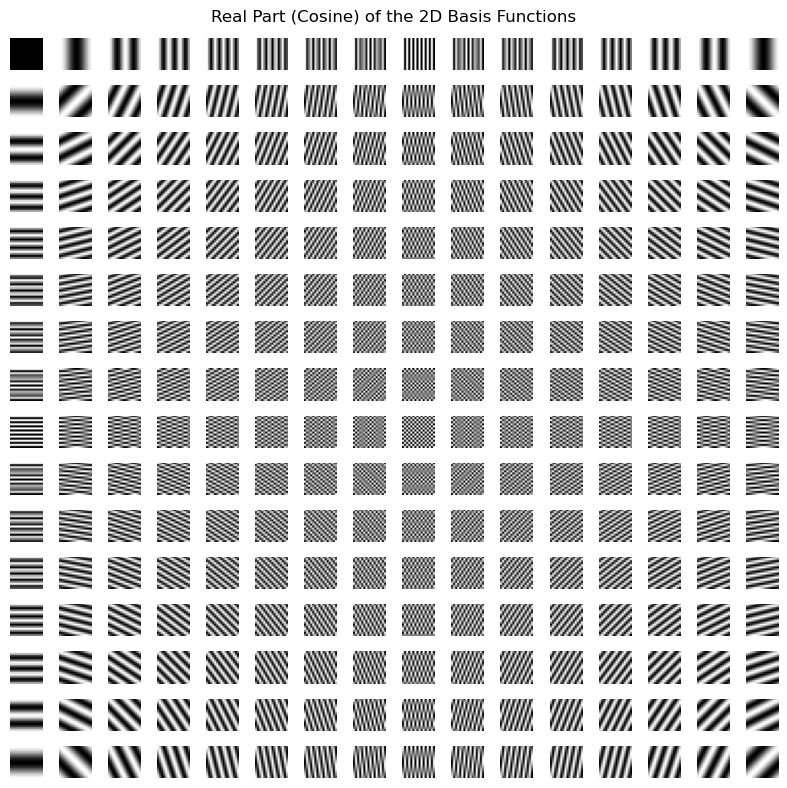

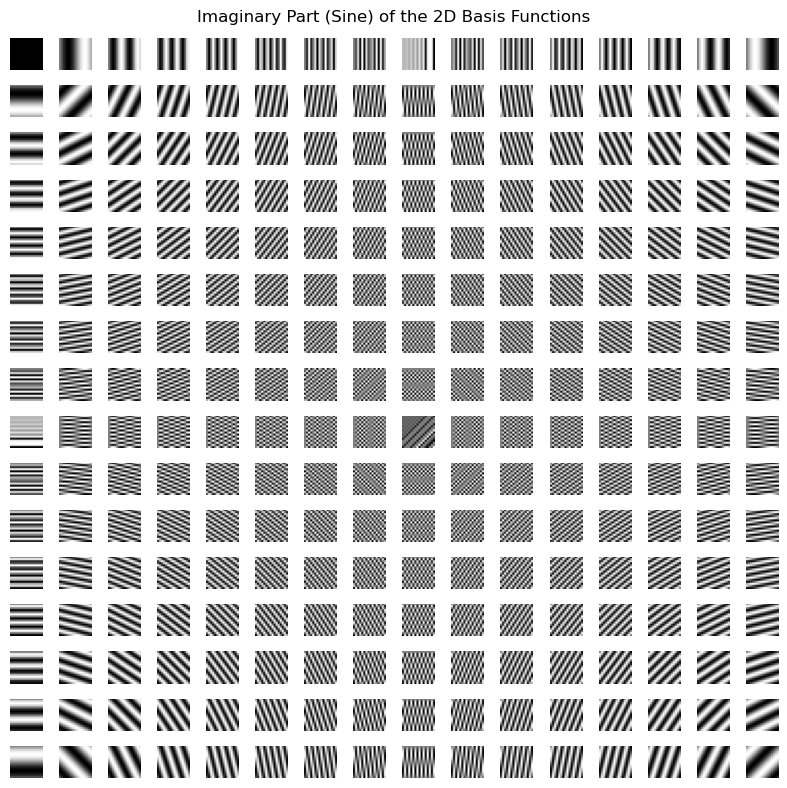

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def basis_function(img_size=256, u=0, v=0):
    """
    Generate the 2D complex exponential basis function e^{-2 pi i (ux + vy)/N}.
    Returns the real (cosine) and imaginary (sine) parts separately.
    """
    N = img_size
    x = np.linspace(0, N-1, N)
    y = np.linspace(0, N-1, N)
    x_, y_ = np.meshgrid(x, y)
    bf = np.exp(-1j*2*np.pi*(u*x_/N + v*y_/N))
    real_part = np.real(bf)
    imag_part = np.imag(bf)
    return real_part, imag_part

size = 16
bf_arr_real = []
bf_arr_imag = []

# Sample a 16x16 grid of frequencies (u, v)
for v in range(size):
    for u in range(size):
        re, im = basis_function(img_size=size, u=u, v=v)
        bf_arr_real.append(re)
        bf_arr_imag.append(im)

fig, axes = plt.subplots(size, size, figsize=(8, 8))
axes = axes.flatten()
for ax, basis_img in zip(axes, bf_arr_real):
    ax.axis("off")
    ax.imshow(basis_img, cmap="gray")

fig.suptitle("Real Part (Cosine) of the 2D Basis Functions")
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(size, size, figsize=(8, 8))
axes = axes.flatten()
for ax, basis_img in zip(axes, bf_arr_imag):
    ax.axis("off")
    ax.imshow(basis_img, cmap="gray")

fig.suptitle("Imaginary Part (Sine) of the 2D Basis Functions")
plt.tight_layout()
plt.show()

Notice how each basis function is a combination of sinusoidal waves in 2D.

### Example: 2D Fourier Transform and Convolution

Let’s apply a **horizontal Prewitt filter** via direct 2D convolution and compare it to frequency-domain multiplication.

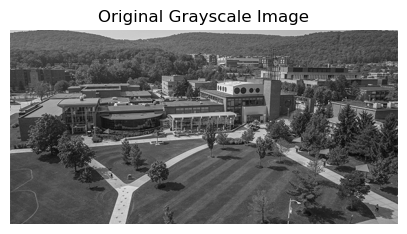

In [4]:
import requests
from io import BytesIO
from PIL import Image

def read_jpeg_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    if img.mode != 'RGB':
        img = img.convert('RGB')
    return img

def image_to_numpy(img):
    return np.array(img)

def to_gray_scale(img_np):
    return np.mean(img_np, axis=2)

# Example image
url = "https://www.binghamton.edu/news/images/uploads/features/20180815_peacequad02_jwc.jpg"
img = read_jpeg_from_url(url)
img_np = image_to_numpy(img)
img_gray = to_gray_scale(img_np)

plt.figure(figsize=(5,5))
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

#### Frequency-Domain Convolution

1. Compute the 2D FFT (Fast Fourier Transform) of the image.
2. Zero-pad the kernel to the size of the image and take its 2D FFT.
3. Multiply these two 2D FFTs.
4. Take the inverse FFT to get the convolved result.

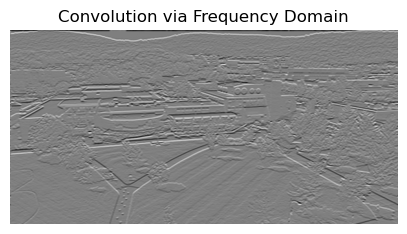

In [5]:
K = np.array([[-1, -1, -1],
              [ 0,  0,  0],
              [ 1,  1,  1]])

# Pad the kernel to match the image shape
K_padded = np.zeros_like(img_gray)
K_padded[:K.shape[0], :K.shape[1]] = K

# 2D FFT of image and kernel
FX = np.fft.fft2(img_gray)
FK = np.fft.fft2(K_padded)

# Multiply in frequency domain & inverse FFT
conv_freq = FX * FK
conv_spatial = np.real(np.fft.ifft2(conv_freq))

plt.figure(figsize=(5,5))
plt.imshow(conv_spatial, cmap='gray')
plt.title("Convolution via Frequency Domain")
plt.axis("off")
plt.show()

Observe how edges running horizontally are highlighted. The filter has suppressed most of the low-frequency (smooth) content, accentuating changes in the vertical direction of the image.

```{note}
A classic application of the 2D Fourier transform is **JPEG compression**:

1. Break the image into 8x8 blocks.
2. Apply the 2D Discrete Cosine Transform (which is related to the Fourier transform).
3. Keep only the low-frequency components that the human eye perceives most.
4. Discard (or quantize heavily) high-frequency components we don’t see well.

This dramatically reduces file size with minimal perceived loss of quality.
```

## Key Lesson from Image Processing

- **Convolution as Pattern Matching**: Applying a kernel is like taking an inner product with a small patch of the image. Kernels detect certain local patterns (edges, corners, textures).
- **Convolution in the Frequency Domain**: The Fourier transform lets us view images as sums of sinusoidal patterns. In this viewpoint, convolution is simply multiplication in frequency space.
- **Filters as Frequency Selectors**: Kernels like Prewitt emphasize high-frequency components (edges), while other kernels (e.g., Gaussian blur) emphasize low-frequency components.

These insights underlie a huge variety of image processing techniques and pave the way for more advanced methods (e.g., wavelet transforms, deep CNNs, and beyond).

```{note}
**Reflection**:
- How might a kernel that *blurs* an image look in the frequency domain?
- Why do sharp edges correspond to high-frequency content?
- How can thinking in frequencies sometimes be simpler than manipulating pixels directly?
```